In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar


Data taken from Washington Post website: https://www.washingtonpost.com/graphics/2018/local/school-shootings-database/?utm_term=.4452c91548ea

In [67]:
df_data = pd.read_csv('school-shootings-data.csv')

In [3]:
df_data.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.6,9,12,41.0,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.0,6,8,495.0,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.0,9,12,125.0,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.0,9,12,2007.0,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,NaN,9,12,543.0,Suffolk County,25,25025,11.0


In [4]:
df_data.columns

Index(['uid', 'nces_school_id', 'school_name', 'nces_district_id',
       'district_name', 'date', 'school_year', 'year', 'time', 'day_of_week',
       'city', 'state', 'school_type', 'enrollment', 'killed', 'injured',
       'casualties', 'shooting_type', 'age_shooter1', 'gender_shooter1',
       'race_ethnicity_shooter1', 'shooter_relationship1', 'shooter_deceased1',
       'deceased_notes1', 'age_shooter2', 'gender_shooter2',
       'race_ethnicity_shooter2', 'shooter_relationship2', 'shooter_deceased2',
       'deceased_notes2', 'white', 'black', 'hispanic', 'asian',
       'american_indian_alaska_native', 'hawaiian_native_pacific_islander',
       'two_or_more', 'resource_officer', 'weapon', 'weapon_source', 'lat',
       'long', 'staffing', 'low_grade', 'high_grade', 'lunch', 'county',
       'state_fips', 'county_fips', 'ulocale'],
      dtype='object')

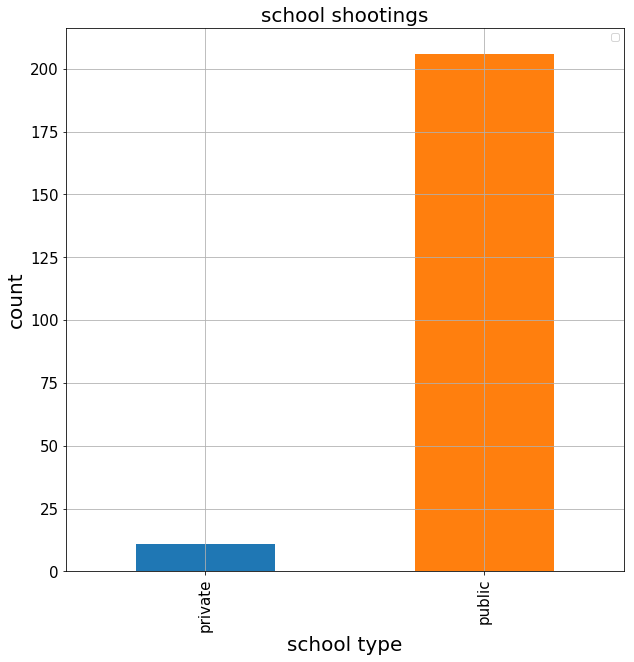

In [116]:
df_schl_type_cnt = df_data.groupby('school_type').count()
ax = df_schl_type_cnt.plot(kind = 'bar',y='uid', figsize = (10,10))
ax.set_ylabel('count',size = 20)
ax.set_xlabel('school type',size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend('')
plt.title('school shootings',size = 20)
ax.grid(True)


In [3]:
df_data.groupby('shooting_type').count()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
shooting_type,,,,,,,,,,,,,,,,,,,,,
accidental,26,26,26,25,25,26,26,26,23,26,...,26,26,24,26,26,22,26,26,26,26
accidental or targeted,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
hostage suicide,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
indiscriminate,42,42,42,41,41,42,42,42,40,42,...,42,42,39,42,42,38,42,42,42,42
public suicide,4,4,4,3,3,4,4,4,4,4,...,4,4,4,4,4,3,4,4,4,4
public suicide (attempted),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
targeted,130,128,130,123,123,130,130,130,124,130,...,130,130,118,128,128,115,130,130,130,129
targeted and indiscriminate,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
unclear,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


Text(0.5,1,'school shootings')

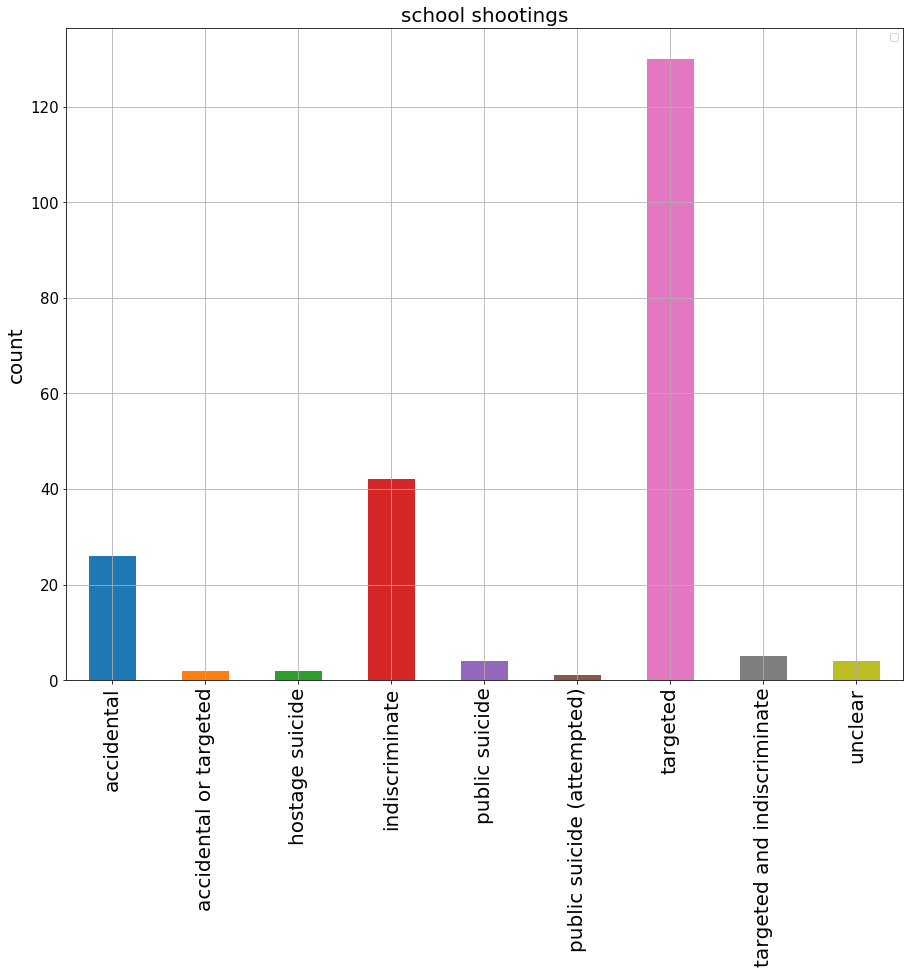

In [146]:
df_sch_sht_type = df_data.groupby('shooting_type').count()
ax = df_sch_sht_type.plot(y = 'uid', kind = 'bar', figsize = (15,12))
ax.set_ylabel('count',size = 20)
ax.set_xlabel('',size = 20)
plt.xticks(size = 20)
plt.yticks(size = 15)
plt.legend('')
ax.grid(True)
plt.title('school shootings',size = 20)



Text(0.5,1,'school shootings')

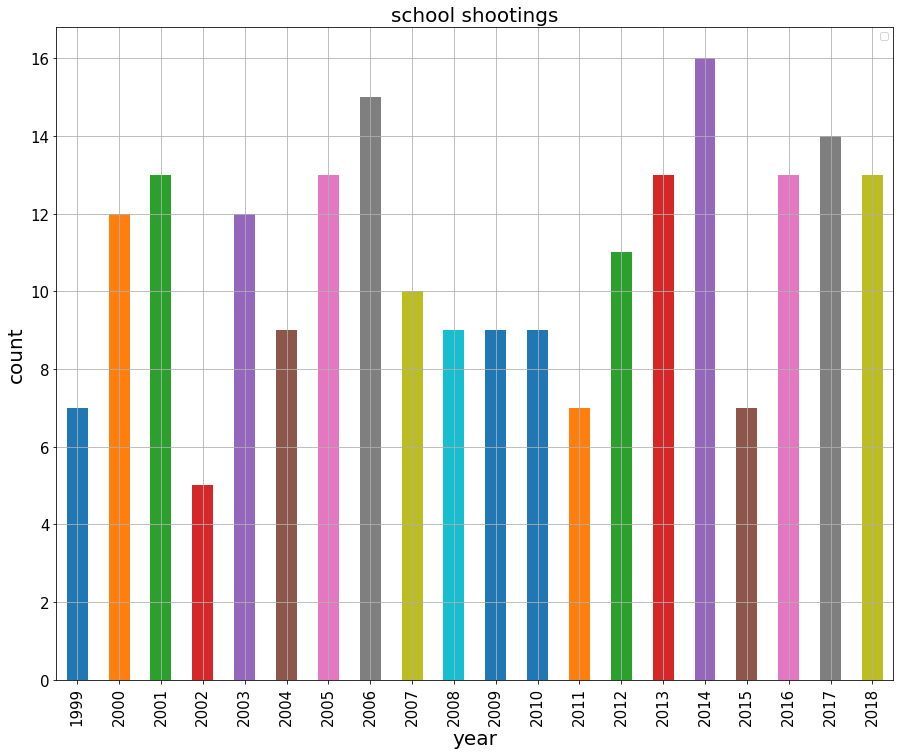

In [118]:

ax =df_data.groupby('year').count().plot(kind = 'bar', y = 'uid', figsize = (15,12))
ax.grid(True)
plt.ylabel('count',size = 20)
plt.xlabel('year',size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend('')
plt.title('school shootings',size = 20)


## Seasonality in frequence of shooting

## School shooting: strong seasonality

In [69]:
df_data['month'] = pd.DatetimeIndex(df_data['date']).month

Text(0.5,1,'school shootings')

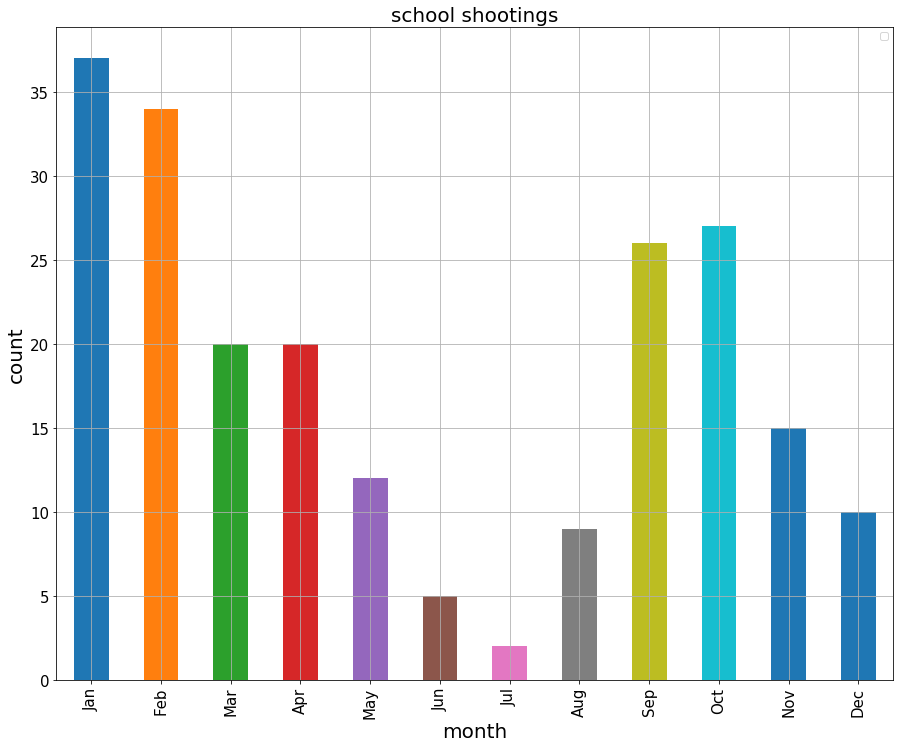

In [127]:
df_sch_sht_month = df_data.groupby('month').count()
ax = df_sch_sht_month.plot(y = 'uid',kind = 'bar',figsize = (15,12))
plt.ylabel('count',size = 20)
plt.xlabel('month',size = 20)
ax.set_xticklabels([calendar.month_abbr[int(x.get_text())] for x in ax.get_xticklabels()])
ax.grid(True)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend('')
plt.title('school shootings',size = 20)


It can be seen that there is a strong seasonaity to shooting incidents. They are very high during January, February, Septemeber and October. A chi-square test will establish the statistical significance of the dependence of month

## shooting type in school shootings: Targeted types have strong seasonality

In [121]:
df_data_cln_shoot_type = df_data.dropna(subset = ['shooting_type'],axis = 0)

Text(0.5,1,'Targeted school shootings')

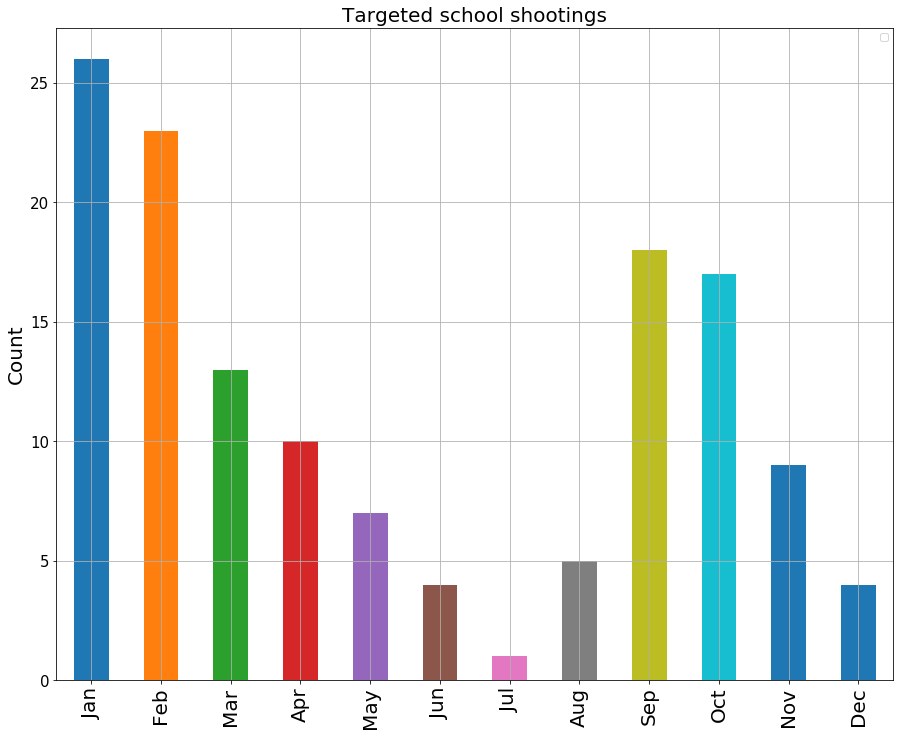

In [147]:
ax = df_data_cln_shoot_type[df_data_cln_shoot_type['shooting_type'].str.contains('targeted') == True].groupby('month').count().plot(y='uid', kind = 'bar',figsize = (15,12))


plt.ylabel('Count',size = 20)
plt.xlabel('',size = 20)
ax.set_xticklabels([calendar.month_abbr[int(x.get_text())] for x in ax.get_xticklabels()])
ax.grid(True)
plt.xticks(size = 20)
plt.yticks(size = 15)
plt.legend('')
plt.title('Targeted school shootings',size = 20)


Text(0.5,1,'Non-targeted school shootings')

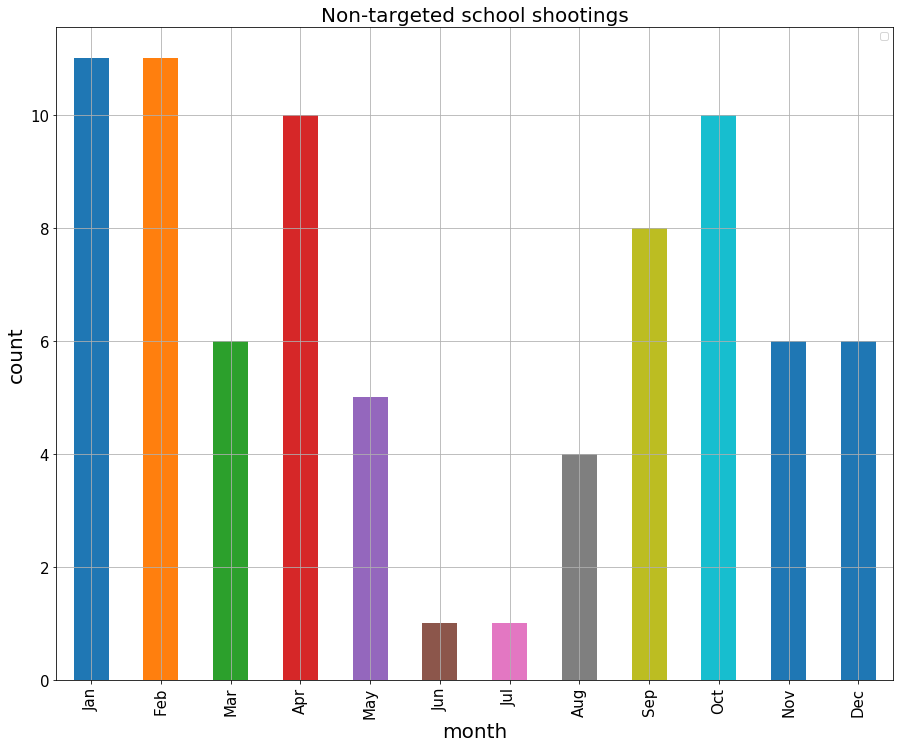

In [149]:
ax =df_data_cln_shoot_type[df_data_cln_shoot_type['shooting_type'].str.contains('targeted') == False].groupby('month').count().plot(y='uid', kind = 'bar',figsize = (15,12))

plt.ylabel('count',size = 20)
plt.xlabel('month',size = 20)
ax.set_xticklabels([calendar.month_abbr[int(x.get_text())] for x in ax.get_xticklabels()])
ax.grid(True)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend('')
plt.title('Non-targeted school shootings',size = 20)


A large percentage of shootings seen in Jan, Feb, Sep and Oct is "targeted". This implies that these need some planning.

### Chi-square test

In [14]:
dat_num = df_data.groupby('month').count()['uid']

In [15]:
from scipy.stats import chisquare

In [16]:
avg = [dat_num.sum()/ len(dat_num)]*12

In [17]:
print ("probability of the observed shooings to be independent of the month is ",chisquare(dat_num, avg)[1])

probability of the observed shooings to be independent of the month is  6.723162927917046e-12


## Mass shooting: No seasonality

Data of all mass shootings ( which are indiscriminate in nature) show no seasonality. Data taken from Mother Jones website:  https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/

In [139]:
df_MJ = pd.read_csv('MJ_1982_2018 _US_mass_shootings.csv')
df_MJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 22 columns):
case                                   99 non-null object
location                               99 non-null object
date                                   99 non-null object
year                                   99 non-null int64
summary                                99 non-null object
Fatalities                             99 non-null int64
Injured                                99 non-null int64
total_victims                          99 non-null object
Venue                                  99 non-null object
Prior signs of mental health issues    99 non-null object
Mental health - details                98 non-null object
Weapons obtained legally               99 non-null object
Where obtained                         98 non-null object
Type of weapons                        99 non-null object
Weapon details                         99 non-null object
Race                          

In [141]:
df_MJ['month'] = pd.DatetimeIndex(df_MJ['date']).month

Text(0.5,1,'Mass shootings')

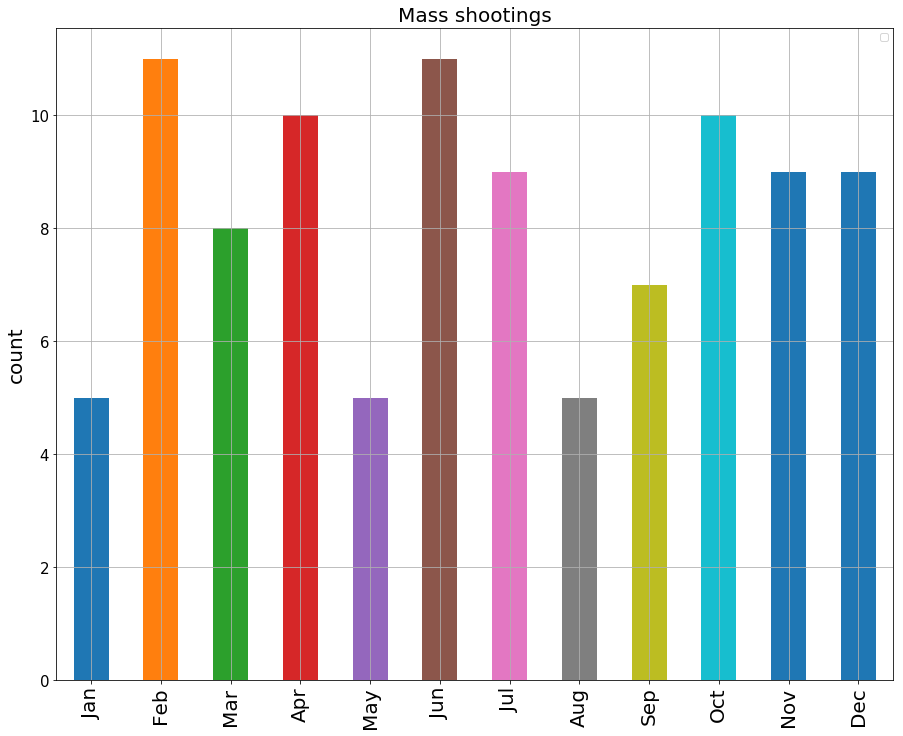

In [145]:
df_sch_sht_month = df_MJ.groupby('month').count()
ax = df_sch_sht_month.plot(y = 'case',kind = 'bar',figsize = (15,12))
plt.ylabel('count',size = 20)
plt.xlabel('',size = 20)
ax.set_xticklabels([calendar.month_abbr[int(x.get_text())] for x in ax.get_xticklabels()])
ax.grid(True)
plt.xticks(size = 20)
plt.yticks(size = 15)
plt.legend('')
plt.title('Mass shootings',size = 20)

Clearly, histogram shows that there is no seasonality in indsicriminate shooting incidents. Chi-square test indicates the same

In [21]:
dat_MJ_num = df_MJ.groupby('month').count()['case']

In [22]:
avg_MJ = [dat_MJ_num.sum()/ len(dat_MJ_num)]*12

In [23]:
print ("probability of the observed shooings to be independent of the month is ",chisquare(dat_MJ_num, avg_MJ)[1])

probability of the observed shooings to be independent of the month is  0.81361053450126


Clearly, chi-square test also shows that there is no seasonality

## Google trends data

search volume for keyword 'gun' was downloaded from google trends webpage: https://trends.google.com/trends/explore?date=2018-03-30%202018-04-30&geo=US&q=gun

In [24]:
df_goog = pd.read_csv('multiTimeline.csv')

In [25]:
df_goog.head()

,Month,gun
0,2004-01,41
1,2004-02,39
2,2004-03,40
3,2004-04,40
4,2004-05,37


In [26]:
df_goog['date'] = pd.DatetimeIndex(df_goog['Month'])

In [27]:
df_goog.set_index(['date'],inplace=True)

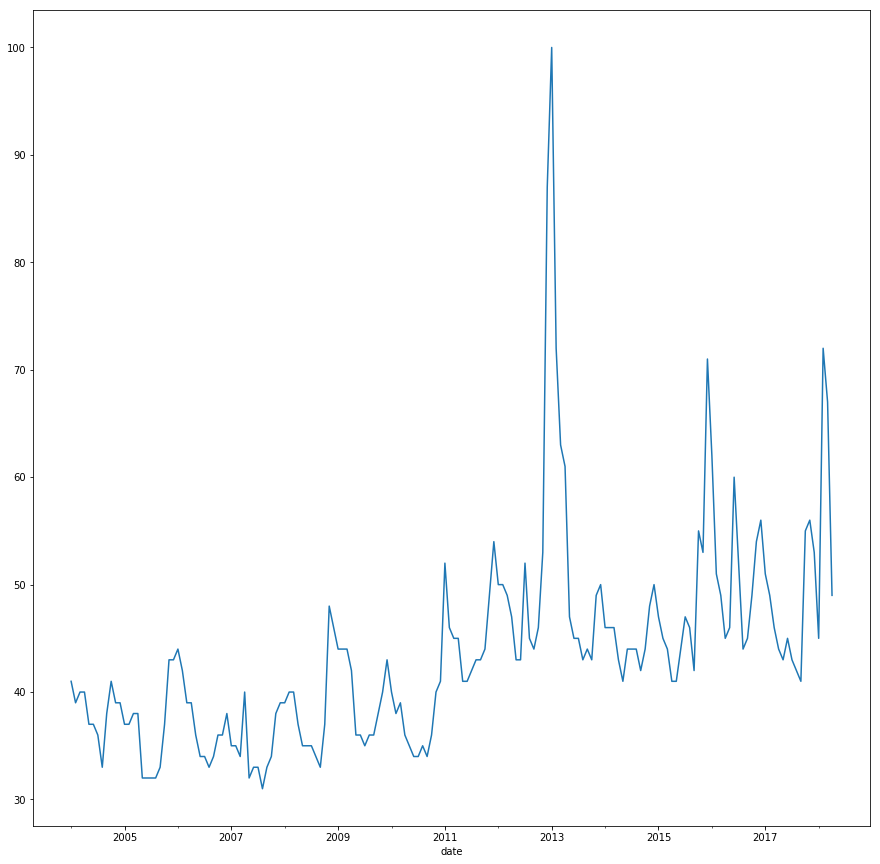

In [28]:
df_goog['gun'].plot(figsize=(15,15))